<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2026/blob/main/Paradigma_de_ML_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O Paradigma do Aprendizado de Máquina**
---

Vamos aquecer?


**Exercício 1**. Acesse ou construa um conjunto de dados numéricos, pares $(X, y)$ como os dados de temperatura C e F. Escolha, por exemplo, uma função linear $y = aX + b$. Você pode por exemplo criar um `Numpy` array de valores e aplicar essa função, associar valores manualmente ou ler uma tabela (excel ou .csv). Em seguida empregue o exemplo do material anterior para fazer uma predição das saídas $y$ com base em um modelo de aprendizado linear.

**Exercício 2**. Altere no exercício anterior as entradas $X$ para dados com duas ou mais dimensões. $y$ agora será uma função com múltiplas entradas.



<img src="https://github.com/Rogerio-mack/work/raw/main/IMT/MLparadigmas_C2F.gif" width=800, align="center">

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Das notas de aula...

In [25]:
def Celsius2Fahrenheit(Celsius):
  return Celsius * 9/5 + 32

In [26]:
df = pd.DataFrame()
df['celsius'] = np.arange(-20,60)
df['fahrenheit'] = Celsius2Fahrenheit( df['celsius'] )
df.head()


,celsius,fahrenheit
0,-20,-4.0
1,-19,-2.2
2,-18,-0.4
3,-17,1.4
4,-16,3.2


In [27]:
from sklearn.linear_model import LinearRegression

X = df[['celsius']]
y = df[['fahrenheit']]

regressor = LinearRegression()
regressor.fit(X, y)



LinearRegression()

In [28]:
Fahrenheit_prediction = regressor.predict(pd.DataFrame({'celsius':[0,27]}))
print(Fahrenheit_prediction)

[[32. ]
 [80.6]]


# O mesmo programa, trocando a entrada pela saída

In [29]:
from sklearn.linear_model import LinearRegression

y = df[['celsius']]
X = df[['fahrenheit']]

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [30]:
Celsius_prediction = regressor.predict(pd.DataFrame({'fahrenheit':[32,80.6]}))
print(Celsius_prediction)



[[ 0.]
 [27.]]


In [31]:
# The coefficients
print("Coefficients: \n", regressor.coef_, regressor.intercept_)

Coefficients: 
 [[0.55555556]] [-17.77777778]


# Um conjunto de dados desconhecido...

In [32]:
#@markdown just run
x = np.sort(np.random.randint(-20,50,16))
y = np.pi * x + np.exp(1)
df = pd.DataFrame({'x':x, 'y':y})
df.to_csv('data.csv',index=None)
# df


In [33]:
df = pd.read_csv('data.csv')
df.head()

,x,y
0,-14,-41.264015
1,-7,-19.272867
2,-7,-19.272867
3,-6,-16.131274
4,-6,-16.131274


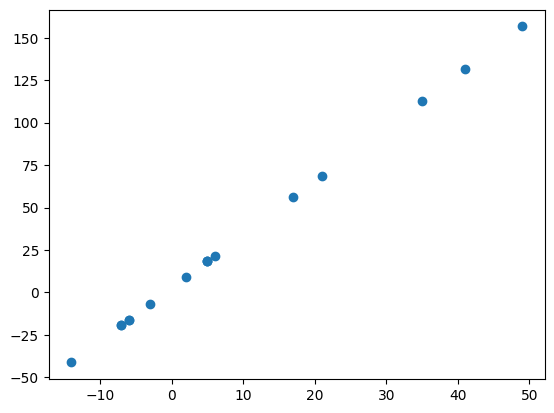

In [34]:
import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.show()

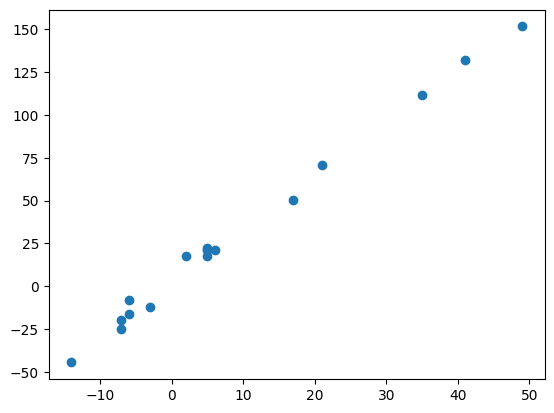

In [39]:
df['y'] = df['y'] + 4*np.random.normal(0,1,len(df))

import matplotlib.pyplot as plt

plt.scatter(df['x'], df['y'])
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression

y = df[['y']]
X = df[['x']]

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [41]:
y_prediction = regressor.predict(pd.DataFrame({'x':[10,27]}))
print(y_prediction)

[[34.02004514]
 [86.80168747]]


In [42]:
# The coefficients
print("Coefficients: \n", regressor.coef_, regressor.intercept_)

Coefficients: 
 [[3.10480249]] [2.97202023]


## A função desconhecida...



$$y = \pi x + e$$

# Um novo problema

$$z = sin(x)$$
$$y = \pi x + 2 z + e = \pi x + 2 sin(x) + e$$

In [ ]:
df['z'] = np.sin(df['x'])

In [ ]:
df['y'] = df['y'] + 2*df['z']

In [ ]:
from sklearn.linear_model import LinearRegression

y = df[['y']]
X = df[['x','z']]

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
# The coefficients
print("Coefficients: \n", regressor.coef_, regressor.intercept_)

Coefficients: 
 [[3.14159265 2.        ]] [2.71828183]
